In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ietf_wg_mb_extractor import IETF_WG_MB_Extractor
from argparse import ArgumentParser

%load_ext autoreload
%autoreload 2
from explore_data import DataExplorer
from prepare_data import DataPreparator

In [2]:
def set_parameters(grid_color, axes_edgecolor, axes_facecolor, figsize):
    sns.set(rc={"grid.color": grid_color, 
                "axes.edgecolor": axes_edgecolor, 
                "axes.facecolor": axes_facecolor,
                'figure.figsize': figsize})

In [3]:
set_parameters(grid_color="#99e2b4", axes_edgecolor="#99e2b4", axes_facecolor="#e6ffed", figsize=(9, 5))

In [4]:
archive_path = 'email-archives/'

In [5]:
extractor = IETF_WG_MB_Extractor(archive_path)
extractor.combine_wg_files(ratio=None)
active_wg_dataframe = extractor.get_combined_wg_dataframes()

Successfully scraped active WG names
------------------------------------
Successfully extracted names of active WGs existing in files
------------------------------------------------------------
Successfully converted and concatenated all .csv files into one dataframe
-------------------------------------------------------------------------


In [6]:
data_preparator = DataPreparator(extractor)
clean_wg_dataframe = data_preparator.emails_df_cleaning(active_wg_dataframe)
processed_bodies = data_preparator.preprocess_bodies()
text_coll_combined = data_preparator.wg_combined_bodies_to_dict(processed_bodies)
text_coll_default = data_preparator.wg_bodies_to_dict(processed_bodies)

data_explorer = DataExplorer(colors = ['#eee82c', '#91cb3e', '#17A72D', '#4c934c','#368245'])

Initial dataframe shape: (534132, 8)
-----------------------------------------
Dataframe shape after cleaning: (47593, 9)

------PROCESSING------



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47593/47593 [00:18<00:00, 2593.22it/s]


Prepocessing time: 18.36 s.

Number of mails removed: 7342
---------------------------------------
Encrypted messages: 3439
Ill-formated messages: 208
Announc. messages: 3693
Unknown endcoding messages: 2
Empty messages (after pre-processing): 765
---------------------------------------
Total number of mails after processing: 39486


In [7]:
test_wg = 'netmod'

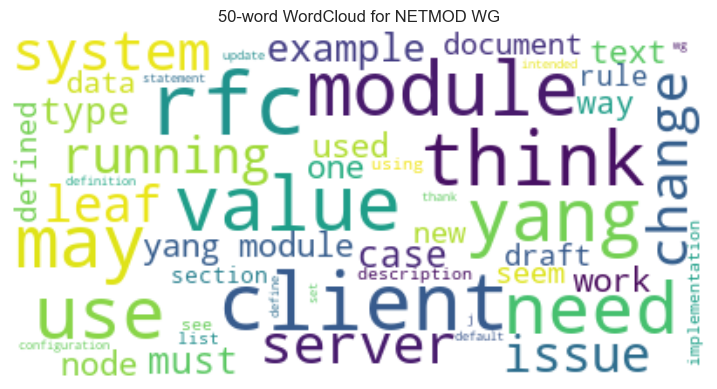

In [8]:
data_explorer.wg_wordcloud(text_coll_combined ,test_wg, max_words=50)

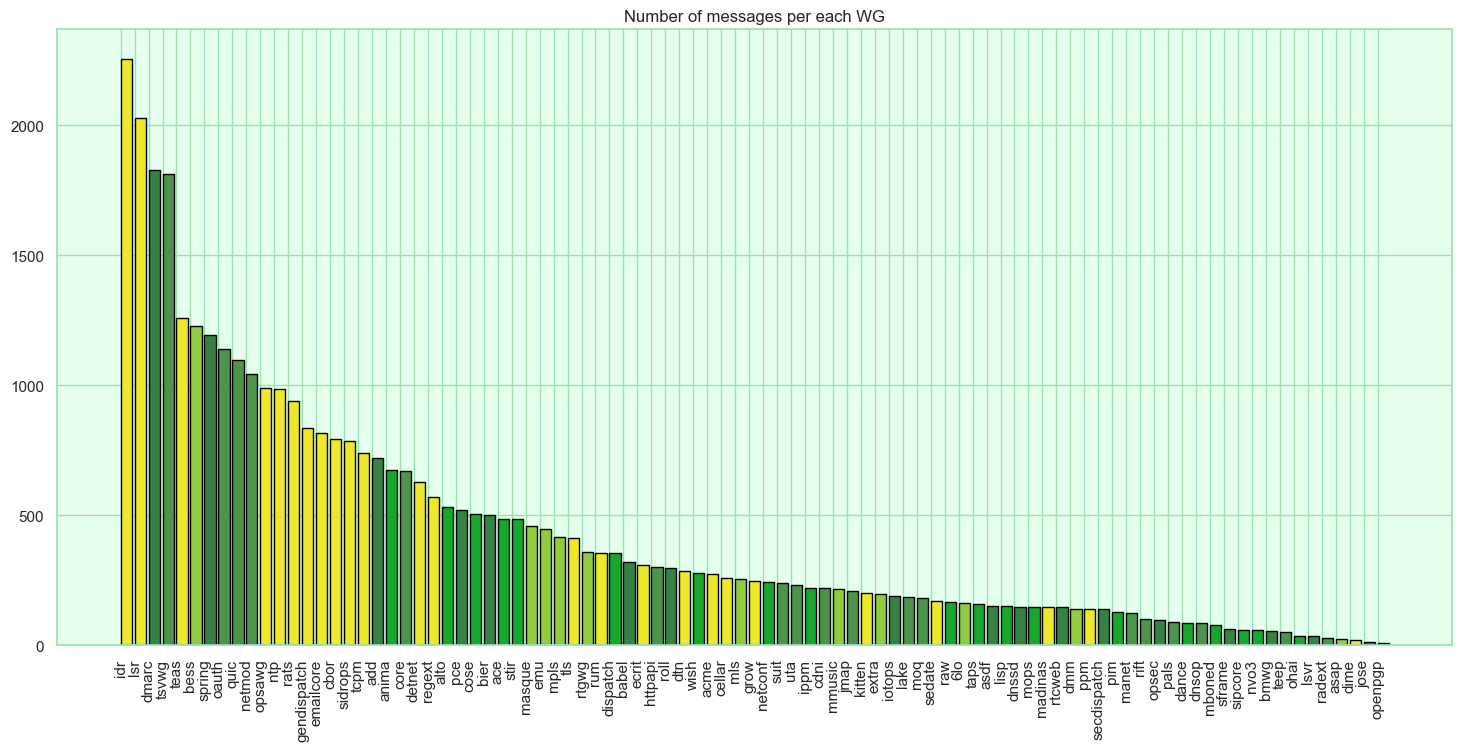

In [9]:
data_explorer.messages_per_wg(text_coll_default)

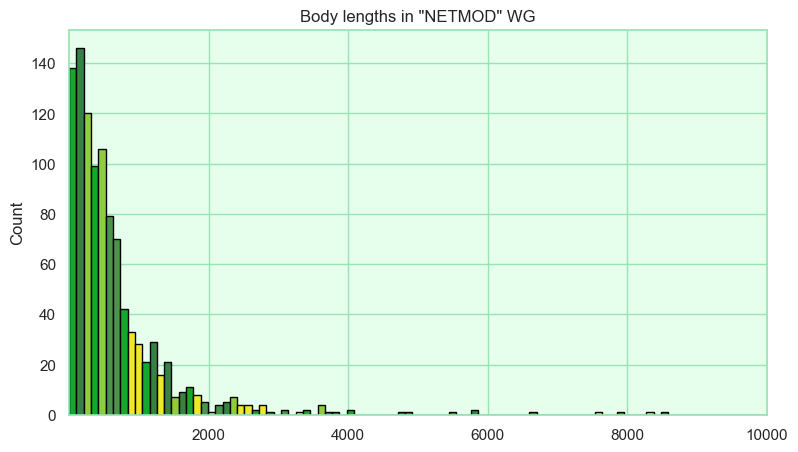

In [10]:
data_explorer.wg_body_len_dist(text_coll_default, test_wg, bins=110)

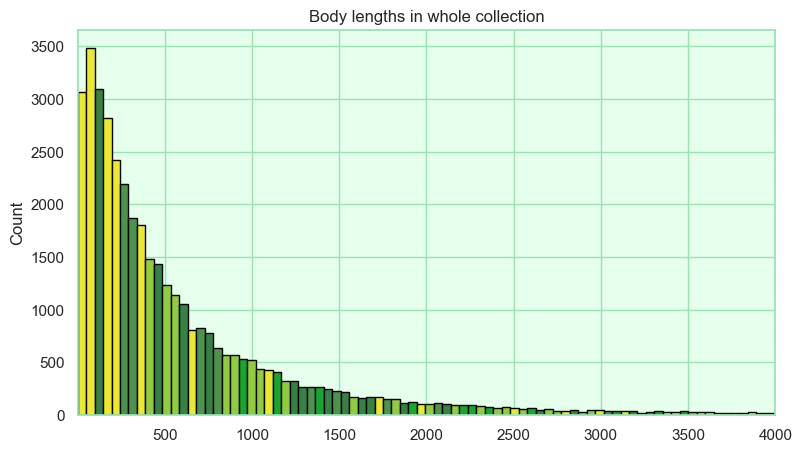

In [11]:
data_explorer.wg_body_len_dist(text_coll_default, bins=2500, whole=True, limit=4000)

In [12]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='count', 
                               wgs=list(text_coll_combined.keys())[:7], 
                               ngram_range=(1,1), 
                               min_df=1)

                 ecrit  rum  manet  iotops  netconf  radext  jmap  total_count
would              152  156     68     128      176      36   118          834
server             282   59      1      13      108      30    59          552
think              106   93     40      87       96       8    78          508
section            136  152     22      32       68       5    64          479
one                128   92     63      65       71       9    46          474
ipr                  0  443      0       1       25       0     1          470
client             191   70      0       6      106      25    46          444
ietf                21  326      9      36       22       2    25          441
use                 73   87     41      74       95       6    50          426
rfc                 59  146     35      26       72      17    54          409
could               91   71     41      72       78       7    49          409
document            73   69     12      69       40 

In [13]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='tf_idf', 
                               wgs=list(text_coll_combined.keys())[:8], 
                               ngram_range=(1,1), 
                               min_df=1)

                 ecrit    rum  manet  iotops  netconf  radext   jmap   roll  \
radius           0.000  0.000  0.000   0.000    0.018   0.546  0.000  0.000   
jmap             0.000  0.000  0.000   0.004    0.000   0.000  0.466  0.000   
smi              0.000  0.000  0.000   0.000    0.000   0.412  0.000  0.000   
draftietfrumrue  0.000  0.365  0.000   0.000    0.000   0.000  0.000  0.000   
dlep             0.000  0.000  0.345   0.000    0.000   0.000  0.000  0.003   
ipr              0.000  0.345  0.000   0.003    0.048   0.000  0.002  0.000   
nas              0.000  0.000  0.000   0.000    0.000   0.343  0.000  0.000   
location         0.341  0.013  0.000   0.002    0.002   0.006  0.000  0.000   
uri              0.330  0.035  0.000   0.000    0.000   0.000  0.023  0.000   
rpl              0.000  0.000  0.000   0.000    0.000   0.000  0.000  0.320   
server           0.315  0.032  0.003   0.026    0.146   0.153  0.103  0.000   
iot              0.000  0.000  0.059   0.308    0.00

In [15]:
data_explorer.sent_lex_vectorizer(text_coll_combined)

                  ecrit  rum  manet  iotops  netconf  radext  jmap  \
intellectual_pos      0  147      0       0        0       0     0   
best_pos              2   18      7       8       16       1     3   
kind_pos              9    9      3       9        5       1     2   
happy_pos             4    3      1       4       11       6     9   
pretty_pos           10    6      1       8        4       0     7   
great_pos             4    1      2       7        8       0    14   
wrong_neg             5    3      1      12        9       0     2   
attack_neg           10    3      2       6        3       1     6   
trust_pos             0    2      1      12        3       0    10   
free_pos              1    5      3       5        5       0     5   
bad_neg               0    4      4       6        5       3     1   
strength_pos          0    0      8       0       12       0     0   
failure_neg           3    3      1       3        6       2     1   
care_pos            

In [42]:
data_explorer.keyword_concordance(text_coll_default, 
                                  list(text_coll_default.keys()),
                                  keywords=['happy'],
                                  left_context=4,
                                  right_context=4,
                                  max_num_samples=20)

Concordandce for the keywords ['happy'] (+4 keyword +4)

WG: 6LO
i would certainly be $happy$ to help folks are
------------------------------

WG: 6LO
effort i would be $happy$ to discuss the topic
------------------------------

WG: ACE
again to handle those $happy$ new year to all
------------------------------

WG: ACE
i would personally be $happy$ if the recommendation is
------------------------------

WG: ACE
provide interoperability i am $happy$ to hear why the
------------------------------

WG: ACE
final version i am $happy$ to see these are
------------------------------

WG: ACE
the update i am $happy$ this document is in
------------------------------

WG: ACE
an email arm is $happy$ to support iot hackathon
------------------------------

WG: ACE
text below i am $happy$ with any other alternatives
------------------------------

WG: ACE
this spec i am $happy$ to keep to one
------------------------------

WG: ACE
the feeling has changed $happy$ to make that change
-------